**MGMT 3450 Operations Management Simulation 1**

In [22]:
# import the inventory data and get a regression line that will work through day 150

# scratch that, get a line through day 42, days 43-50 throw off the regression line

import pandas as pd
import numpy as np
import sys
import scipy as sc
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

#open file inventory-full-days-1-50.csv with inventory data, removed partial days on day 43
inv = pd.read_csv('inventory-full-days-1-50.csv',)

print("Shape of inventory dataframe is ",inv.shape)

#remove the last 7 days because of new inventory arrival on day 44
inv = inv[:-7]

print("Shape of inventory dataframe is now ",inv.shape)

# now get job arrivals

#open file job-arrivals-days-1-50.csv with job arrival data
jobs = pd.read_csv('job-arrivals-days-1-50.csv')

print("Shape of job arrival dataframe is ",jobs.shape)


Shape of inventory dataframe is  (50, 2)
Shape of inventory dataframe is now  (43, 2)
Shape of job arrival dataframe is  (50, 2)


                            OLS Regression Results                            
Dep. Variable:              Inventory   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2676.
Date:                Sun, 10 Sep 2017   Prob (F-statistic):           5.75e-39
Time:                        16:44:33   Log-Likelihood:                -294.27
No. Observations:                  43   AIC:                             592.5
Df Residuals:                      41   BIC:                             596.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.017e+04     72.124    140.976      0.0

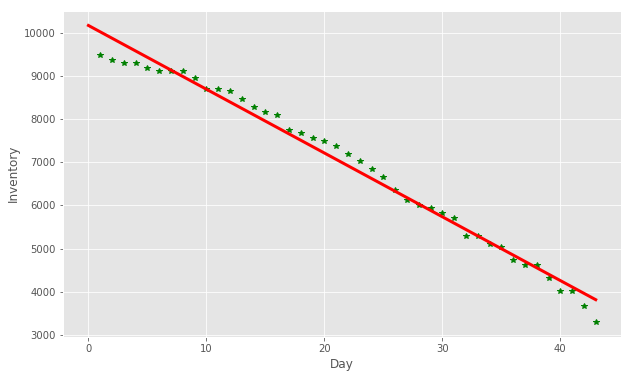

The model is:
              Inventory Level = 10167.7076 + -147.7076 * Day.
r-squared value = 0.9849 (measure of fit)
standard error = 2.8554


In [28]:
# do regression and chart for inventory in this cell

model = sm.ols(formula="Inventory ~ Day", data=inv)
model_result = model.fit()
print(model_result.summary());

day = inv['Day']
inventory = inv['Inventory']

# make listPrice and soldPrice earlier

plt.plot(day,inventory,'g*')

# adapted from http://localhost:8843/notebooks/05-linear-regression.ipynb cell 
# and http://localhost:8869/notebooks/06-regression-2.ipynb
lrDayToInv = linregress(x=day, y=inventory)
print(lrDayToInv)

x = sc.linspace(0,max(day),1000)

# the stats version of y = mx + b
plt.plot(x,lrDayToInv.intercept + lrDayToInv.slope*x,'r',linewidth=3)
plt.xlabel('Day')
plt.ylabel('Inventory')
plt.show()

print('The model is:') 


print('              Inventory Level = ' + str(round(lrDayToInv.intercept,4)) + ' + ' + str(round(lrDayToInv.slope,4)) + ' * Day.')
print("r-squared value = " + str(round(lrDayToInv.rvalue**2,4)) + " (measure of fit)")
print("standard error = " + str(round(lrDayToInv.stderr,4)))




                            OLS Regression Results                            
Dep. Variable:             JobArrival   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     6.387
Date:                Sun, 10 Sep 2017   Prob (F-statistic):             0.0148
Time:                        15:37:12   Log-Likelihood:                -97.596
No. Observations:                  50   AIC:                             199.2
Df Residuals:                      48   BIC:                             203.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4016      0.499      2.807      0.0

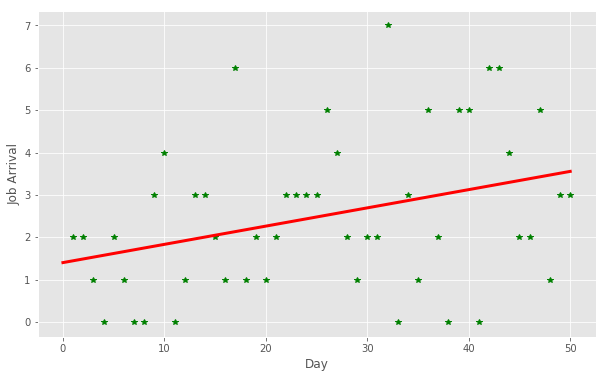

The model is:
              Job Arrivals = 1.4016 + 0.0431 * Day.
r-squared value = 0.1174 (measure of fit)
standard error = 0.017


In [27]:
# do regression and chart for job arrivals in this cell

model = sm.ols(formula="JobArrival ~ Day", data=jobs)
model_result = model.fit()
print(model_result.summary());

day = jobs['Day']
jobArrival = jobs['JobArrival']

# make listPrice and soldPrice earlier

plt.plot(day,jobArrival,'g*')

# adapted from http://localhost:8843/notebooks/05-linear-regression.ipynb cell 
# and http://localhost:8869/notebooks/06-regression-2.ipynb
lrDayToArrival = linregress(x=day, y=jobArrival)
print(lrDayToArrival)

x = sc.linspace(0,max(day),1000)

# the stats version of y = mx + b
plt.plot(x,lrDayToArrival.intercept + lrDayToArrival.slope*x,'r',linewidth=3)
plt.xlabel('Day')
plt.ylabel('Job Arrival')
plt.show()

print('The model is:') 


print('              Job Arrivals = ' + str(round(lrDayToArrival.intercept,4)) + ' + ' + str(round(lrDayToArrival.slope,4)) + ' * Day.')
print("r-squared value = " + str(round(lrDayToArrival.rvalue**2,4)) + " (measure of fit)")
print("standard error = " + str(round(lrDayToArrival.stderr,4)))